In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
plt.rcParams["figure.dpi"] = 120

In [32]:
data_dir = "../data"

In [143]:
df = pd.read_pickle(
    f"{data_dir}/full/bert_results_719254_ds-mmlu.pkl"
).dropna(subset=["uncertainty_before", "uncertainty_after", "uncertainty_difference"])

In [150]:
trained_label = "Computer Security"

In [144]:
df

,text,label,origin,uncertainty_before,uncertainty_after,uncertainty_difference
0,What is penetration testing?,Computer Security,mmlu,256.480621,247.655914,-8.824707
1,Suppose a user has an iPhone (running iOS) and...,Computer Security,mmlu,18.670551,24.974684,6.304132
2,Why is it that anti-virus scanners would not h...,Computer Security,mmlu,78.913239,51.403427,-27.509811
3,"Suppose we define h(H, m) = E(m, H)h(H,m)=E(m,...",Computer Security,mmlu,29.783924,16.882101,-12.901823
4,Which of the following does authentication aim...,Computer Security,mmlu,86.484871,74.974258,-11.510612
...,...,...,...,...,...,...
317,"According to Feinberg, a good moral education:",Philosophy,mmlu,149.677994,166.066483,16.388489
318,"For Socrates, the belief that ""virtue is know...",Philosophy,mmlu,33.580437,21.000154,-12.580282
319,Craig says an actually infinite number of thin...,Philosophy,mmlu,182.665131,203.226013,20.560883
320,Descartes believed that interaction between bo...,Philosophy,mmlu,134.029114,106.934639,-27.094475


In [145]:
df_melted = df[["label", "uncertainty_before", "uncertainty_after"]].melt(
    id_vars=["label"],
    value_vars=["uncertainty_before", "uncertainty_after"],
    var_name="type",
    value_name="uncertainty",
)
df_melted["type"] = df_melted["type"].map(
    {
        "uncertainty_before": "Before",
        "uncertainty_after": "After",
    }
)

df_melted

,label,type,uncertainty
0,Computer Security,Before,256.480621
1,Computer Security,Before,18.670551
2,Computer Security,Before,78.913239
3,Computer Security,Before,29.783924
4,Computer Security,Before,86.484871
...,...,...,...
639,Philosophy,After,166.066483
640,Philosophy,After,21.000154
641,Philosophy,After,203.226013
642,Philosophy,After,106.934639


<Axes: xlabel='label', ylabel='uncertainty'>

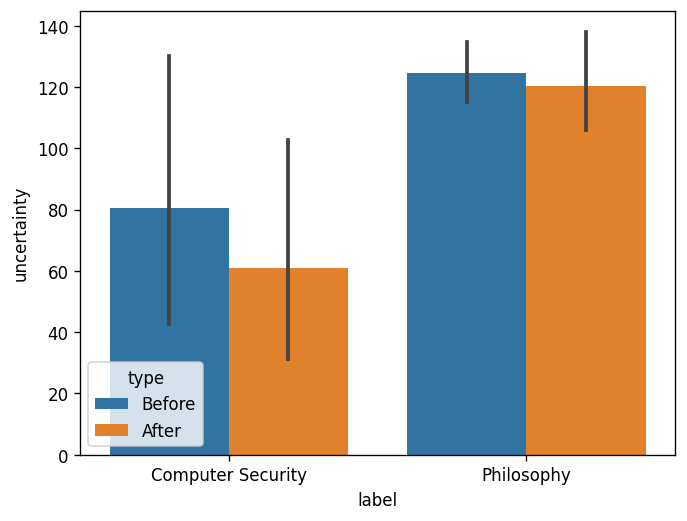

In [146]:
sns.barplot(data=df_melted, x="label", y="uncertainty", hue="type")

<Axes: xlabel='label', ylabel='uncertainty_difference'>

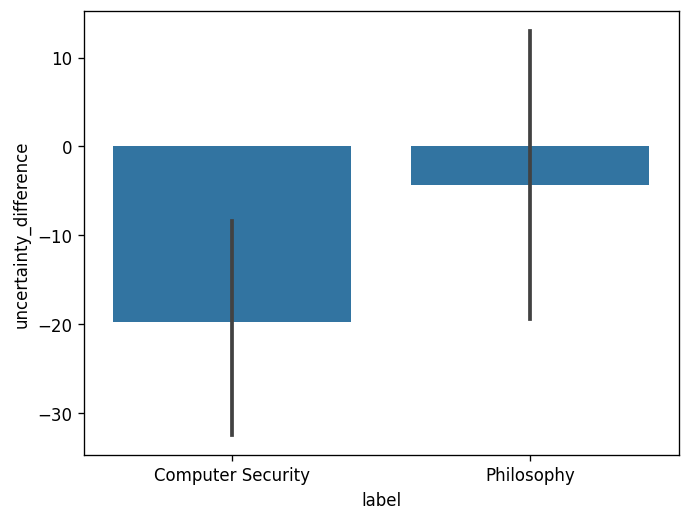

In [147]:
sns.barplot(data=df, x="label", y="uncertainty_difference")

In [151]:
trained_group = df[df["label"] == trained_label]["uncertainty_difference"]
other_groups = df[df["label"] != trained_label]["uncertainty_difference"]

t_stat, p_value = ttest_ind(trained_group, other_groups, equal_var=False)

print(f"Sports vs Others T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

Sports vs Others T-statistic: -1.4467, P-value: 0.1529


In [152]:
labels = df["label"].unique()

for label in labels:
    if label != trained_label:
        other_group = df[df["label"] == label]["uncertainty_difference"]
        t_stat, p_value = ttest_ind(trained_group, other_group, equal_var=False)
        print(f"Sports vs {label:<10} T-statistic: {t_stat:>12.4f}, P-value: {p_value:.4f}")

Sports vs Philosophy T-statistic:      -1.4467, P-value: 0.1529
